# Representation and Visualization of Data

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`. 
This array is usually referrred as the **feature matrix**.

There is also the **label vector**, of size `n_samples`, containing the list of labels
for each samples (_Note_: **ONLY** in the Supervised Learning settings)

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

Here there are $N$ samples and $D$ features.

- $N$ (`n_samples`):   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- $D$ (`n_features`):  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. 

However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

Each sample (data point) is a row in the data array, and each feature is a column.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.  

There are three species of iris in the dataset:

<style type="text/css">
    ul#flowers li {
        display:inline !important;
    }
</style>

<ul id="flowers">
    <li>
        Iris Setosa
        <img src="images/iris_setosa.jpg" width="25%">
    </li>
    <li>
        Iris Versicolor
        <img src="images/iris_versicolor.jpg" width="25%">
    </li>
    <li>
        Iris Virginica
        <img src="images/iris_virginica.jpg" width="25%">
    </li>
</ul>



### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris species. 

#### Data 

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm
  

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="images/petal_sepal.jpg" alt="Sepal" style="width: 25%;"/>

"Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [2]:
iris.keys()

dict_keys(['feature_names', 'target', 'target_names', 'DESCR', 'data'])

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [3]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [4]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

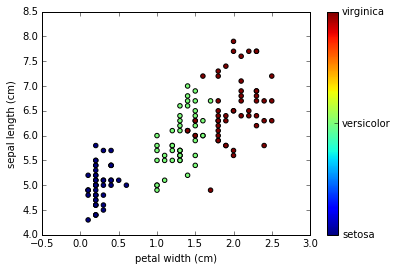

In [8]:
x_index = 3
y_index = 0

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

### Quick Exercise:

**Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**

This exercise is a preview of **dimensionality reduction**

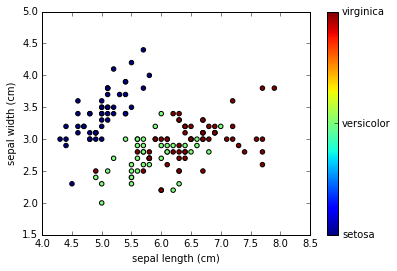

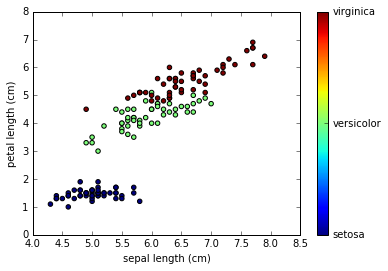

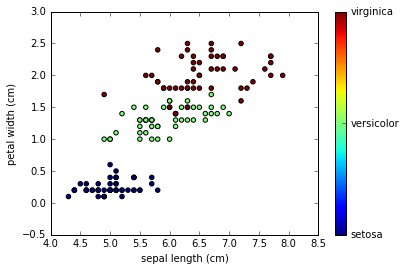

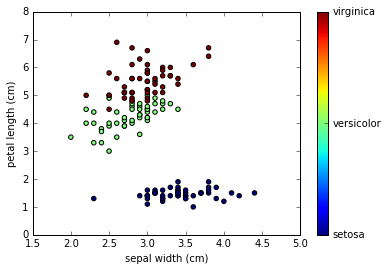

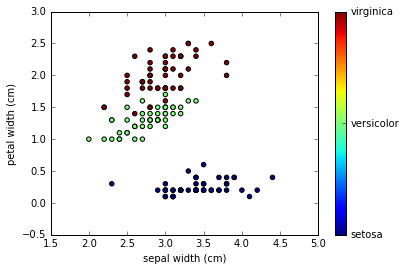

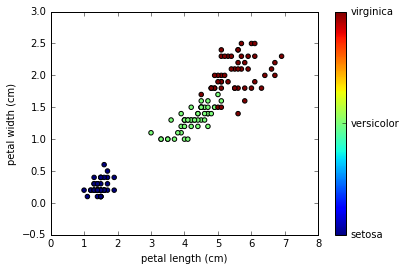

In [5]:
from itertools import combinations

for x_index, y_index in combinations(range(4), 2):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *args: 
                                  iris.target_names[int(i)])

    plt.scatter(iris.data[:, x_index], iris.data[:, y_index], 
                c=iris.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index])
    plt.show()

## Other Available Data

Scikit-learn makes available a host of datasets for testing learning algorithms.
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_<TAB>

or

    datasets.fetch_<TAB>

or

    datasets.make_<TAB>

to see a list of available functions.

In [9]:
from sklearn import datasets

The data downloaded using the ``fetch_`` scripts are stored locally,
within a subdirectory of your home directory.
You can use the following to determine where it is:

In [10]:
from sklearn.datasets import get_data_home
get_data_home()

'/Users/valerio/scikit_learn_data'

Be warned: many of these datasets are quite large, and can take a long time to download!
(especially on Conference wifi).

If you start a download within the IPython notebook
and you want to kill it, you can use ipython's "kernel interrupt" feature, available in the menu or using
the shortcut ``Ctrl-m i``.

You can press ``Ctrl-m h`` for a list of all ``ipython`` keyboard shortcuts.

## Loading Digits Data

Now we'll take a look at another dataset, one where we have to put a bit
more thought into how to represent the data.  We can explore the data in
a similar manner as above:

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

In [12]:
digits.keys()

dict_keys(['images', 'target', 'target_names', 'DESCR', 'data'])

In [13]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [14]:
print(digits.data[0])
print(digits.target)

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[0 1 2 ..., 8 9 8]


The target here is just the digit represented by the data.  The data is an array of
length 64... but what does this data mean?

There's a clue in the fact that we have two versions of the data array:
``data`` and ``images``.  Let's take a look at them:

In [15]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


We can see that they're related by a simple reshaping:

In [16]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


Let's visualize the data.  It's little bit more involved than the simple scatter-plot
we used above, but we can do it rather quickly.

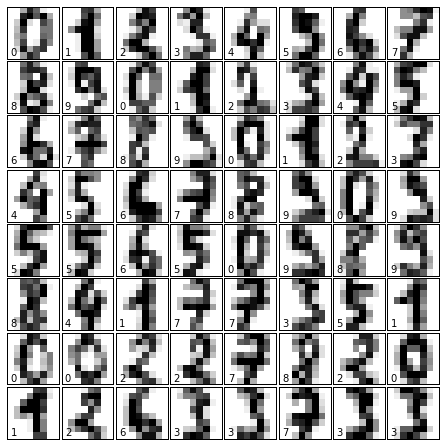

In [17]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, 
                    wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, 
              interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We see now what the features mean.  Each feature is a real-valued quantity representing the
darkness of a pixel in an 8x8 image of a hand-written digit.

Even though each sample has data that is inherently two-dimensional, the data matrix flattens
this 2D data into a **single vector**, which can be contained in one **row** of the data matrix.

## Generated Data: the S-Curve

One dataset often used as an example of a simple nonlinear dataset is the S-curve:

In [18]:
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples=1000)
print(data.shape)
print(colors.shape)

(1000, 3)
(1000,)


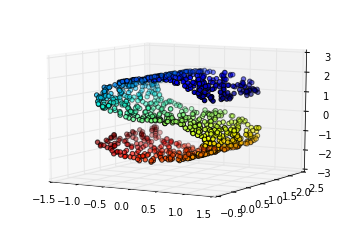

In [19]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
ax.view_init(10, -60)

This example is typically used with an unsupervised learning method called Locally
Linear Embedding.

## Exercise: working with the faces dataset

Here we'll take a moment for you to explore the datasets yourself.
Later on we'll be using the Olivetti faces dataset.
Take a moment to fetch the data (about 1.4MB), and visualize the faces.
You can copy the code used to visualize the digits above, and modify it for this data.

In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
# fetch the faces data
faces = fetch_olivetti_faces()

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/valerio/scikit_learn_data


In [9]:
import numpy as np
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [23]:
face_images = faces.images
face_images.shape

(400, 64, 64)

In [10]:
%matplotlib inline

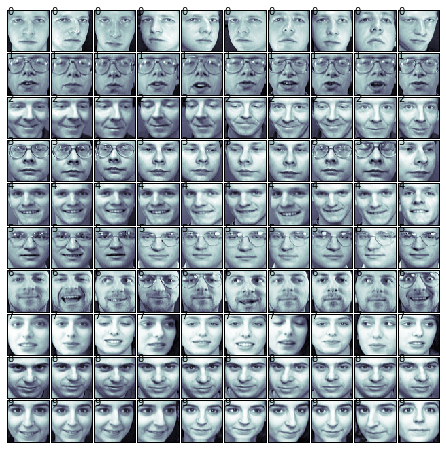

In [30]:
# Use a script like above to plot the faces image data.
# hint: plt.cm.bone is a good colormap for this data
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(face_images[i], cmap=plt.cm.bone, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(faces.target[i]))